In [2]:

import pandas as pd
import numpy as np 
from sklearn import decomposition 
from sklearn import preprocessing 


In [3]:
from functions import *


In [4]:
dispoAli = pd.read_csv("dispo_alimentaire.csv")
dispoAli.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [5]:
dispoAli2 = dispoAli[["Zone","Disponibilité alimentaire (Kcal/personne/jour)", 
                      "Disponibilité de protéines en quantité (g/personne/jour)"]].groupby(by= ["Zone"]).sum()

print(dispoAli2.info())
dispoAli2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Îles Salomon
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)            174 non-null    float64
 1   Disponibilité de protéines en quantité (g/personne/jour)  174 non-null    float64
dtypes: float64(2)
memory usage: 4.1+ KB
None


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,
Afghanistan,2087.0,58.26
Afrique du Sud,3020.0,85.33
Albanie,3188.0,111.37
Algérie,3293.0,91.92
Allemagne,3503.0,101.39


In [6]:
dispoAliAni = dispoAli[dispoAli['Origine']=="animale"]
dispoAliAni.head()
dispoAliAni2 = dispoAliAni[["Zone","Disponibilité alimentaire (Kcal/personne/jour)", 
                            "Disponibilité de protéines en quantité (g/personne/jour)"]].groupby(by= ["Zone"]).sum()
print(dispoAliAni2.info())
dispoAliAni2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Îles Salomon
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)            174 non-null    float64
 1   Disponibilité de protéines en quantité (g/personne/jour)  174 non-null    float64
dtypes: float64(2)
memory usage: 4.1+ KB
None


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,
Afghanistan,216.0,12.21
Afrique du Sud,487.0,36.39
Albanie,985.0,59.41
Algérie,378.0,24.98
Allemagne,1042.0,61.49


In [7]:
dispo = pd.merge(dispoAliAni2, dispoAli2, on = "Zone")
dispo.head()

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité de protéines en quantité (g/personne/jour)_y
Zone,,,,
Afghanistan,216.0,12.21,2087.0,58.26
Afrique du Sud,487.0,36.39,3020.0,85.33
Albanie,985.0,59.41,3188.0,111.37
Algérie,378.0,24.98,3293.0,91.92
Allemagne,1042.0,61.49,3503.0,101.39


In [8]:
dispo['Protein_ani/all'] = dispo["Disponibilité de protéines en quantité (g/personne/jour)_x"]/dispo["Disponibilité de protéines en quantité (g/personne/jour)_y"]
dispo= dispo.rename({"Disponibilité alimentaire (Kcal/personne/jour)_x": "Calorie_ani/p",
                         "Disponibilité de protéines en quantité (g/personne/jour)_x": "Protein_ani/p", 
                        "Disponibilité alimentaire (Kcal/personne/jour)_y": "Calorie_all/p", 
                       "Disponibilité de protéines en quantité (g/personne/jour)_y": "Protein_all/p"}, axis= 1).reset_index()

dispo.head()


,Zone,Calorie_ani/p,Protein_ani/p,Calorie_all/p,Protein_all/p,Protein_ani/all
0,Afghanistan,216.0,12.21,2087.0,58.26,0.209578
1,Afrique du Sud,487.0,36.39,3020.0,85.33,0.426462
2,Albanie,985.0,59.41,3188.0,111.37,0.533447
3,Algérie,378.0,24.98,3293.0,91.92,0.271758
4,Allemagne,1042.0,61.49,3503.0,101.39,0.606470


In [9]:
volaille = pd.read_csv("FAOSTAT_volaille_11-15-2021.csv")
volaille.head(10)
volaillealiment = volaille[volaille['Élément'] == 'Disponibilité alimentaire (Kcal/personne/jour)']
volaillealiment = volaillealiment[["Zone", "Valeur"]].rename({"Valeur": "Calorie_chicken/p"}, axis=1)
print(volaillealiment.info())
volaillealiment.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 1 to 520
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zone               174 non-null    object 
 1   Calorie_chicken/p  174 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB
None


,Zone,Calorie_chicken/p
1,Afghanistan,5.0
4,Afrique du Sud,155.0
7,Albanie,50.0
10,Algérie,24.0
13,Allemagne,67.0


In [10]:
dispodata=pd.merge(dispo[["Zone", "Calorie_all/p","Protein_all/p","Protein_ani/all"]], volaillealiment, on = "Zone")
print(dispodata.info())
dispodata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zone               170 non-null    object 
 1   Calorie_all/p      170 non-null    float64
 2   Protein_all/p      170 non-null    float64
 3   Protein_ani/all    170 non-null    float64
 4   Calorie_chicken/p  170 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.0+ KB
None


,Zone,Calorie_all/p,Protein_all/p,Protein_ani/all,Calorie_chicken/p
0,Afghanistan,2087.0,58.26,0.209578,5.0
1,Afrique du Sud,3020.0,85.33,0.426462,155.0
2,Albanie,3188.0,111.37,0.533447,50.0
3,Algérie,3293.0,91.92,0.271758,24.0
4,Allemagne,3503.0,101.39,0.606470,67.0


In [11]:
pop = pd.read_csv("population.csv")
print(pop.info())
pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [12]:
pop2013=pop[pop["Année"]==2013].drop(["Année"], axis=1)
pop2013.rename(columns= {"Valeur": "2013"}, inplace=True)

pop2018=pop[pop["Année"]==2018].drop(["Année"], axis=1)
pop2018.rename(columns= {"Valeur": "2018"}, inplace=True)
 
print(pop2013.info())
pop2013.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 1410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    236 non-null    object 
 1   2013    236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB
None


,Zone,2013
0,Afghanistan,32269.589
6,Afrique du Sud,53687.121
12,Albanie,2903.790
18,Algérie,38140.133
24,Allemagne,81174.367


In [13]:
pop13_18=pd.merge(pop2013,  pop2018, on = "Zone")
pop13_18["%PopChange"] = (pop13_18["2018"]-pop13_18["2013"])/pop13_18["2013"]    # pop change % over 5 years 2013-2018
print(pop13_18.info())
pop13_18.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        236 non-null    object 
 1   2013        236 non-null    float64
 2   2018        236 non-null    float64
 3   %PopChange  236 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.2+ KB
None


,Zone,2013,2018,%PopChange
0,Afghanistan,32269.589,37171.921,0.151918
1,Afrique du Sud,53687.121,57792.518,0.076469
2,Albanie,2903.790,2882.740,-0.007249
3,Algérie,38140.133,42228.408,0.107191
4,Allemagne,81174.367,83124.418,0.024023


In [14]:
PIBchange = pd.read_csv("FAOSTAT_PIB15-19%persone.csv")
PIBchange = PIBchange[["Zone", "Valeur"]]
PIBchange=PIBchange.rename({"Valeur": "%PIBchange"}, axis=1)
print(PIBchange.info())
PIBchange.head()

#NB: %PIBchange représente la "Croissance annuelle US $ par habitant, aux prix de 2015"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        211 non-null    object 
 1   %PIBchange  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB
None


,Zone,%PIBchange
0,Afghanistan,1.648846
1,Afrique du Sud,-1.157092
2,Albanie,2.278743
3,Algérie,-1.130741
4,Allemagne,0.082724


In [15]:
datafinal = pd.merge(pd.merge(dispodata, pop13_18[["Zone", "%PopChange"]], on = "Zone"), 
                                                   PIBchange, on = "Zone") 
datafinal.to_csv('datafinal_merge.csv')
datafinal = datafinal.set_index("Zone")    #set_index to Zone
datafinal.index.name =''                          #drop the "Zone" for index column 
datafinal.dropna(how= "any", inplace=True)          
datafinal.to_csv('datafinal.csv')
print(datafinal.info())
datafinal.head()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, Afghanistan to Îles Salomon
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Calorie_all/p      169 non-null    float64
 1   Protein_all/p      169 non-null    float64
 2   Protein_ani/all    169 non-null    float64
 3   Calorie_chicken/p  169 non-null    float64
 4   %PopChange         169 non-null    float64
 5   %PIBchange         169 non-null    float64
dtypes: float64(6)
memory usage: 9.2+ KB
None


,Calorie_all/p,Protein_all/p,Protein_ani/all,Calorie_chicken/p,%PopChange,%PIBchange
,,,,,,
Afghanistan,2087.0,58.26,0.209578,5.0,0.151918,1.648846
Afrique du Sud,3020.0,85.33,0.426462,155.0,0.076469,-1.157092
Albanie,3188.0,111.37,0.533447,50.0,-0.007249,2.278743
Algérie,3293.0,91.92,0.271758,24.0,0.107191,-1.130741
Allemagne,3503.0,101.39,0.606470,67.0,0.024023,0.082724


## Clustering 
### A. Clustering hiérarchique_dendrogramme


In [16]:
countries= datafinal.index
variables = datafinal.columns
X = datafinal.values

print(variables)        # variables
print(countries)       # individus

Index(['Calorie_all/p', 'Protein_all/p', 'Protein_ani/all',
       'Calorie_chicken/p', '%PopChange', '%PIBchange'],
      dtype='object')
Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='', length=169)


In [17]:
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

In [18]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
#X_scaled

In [19]:
# Clustering hiérarchique, méthode Ward
Z = linkage(X_scaled, 'ward')

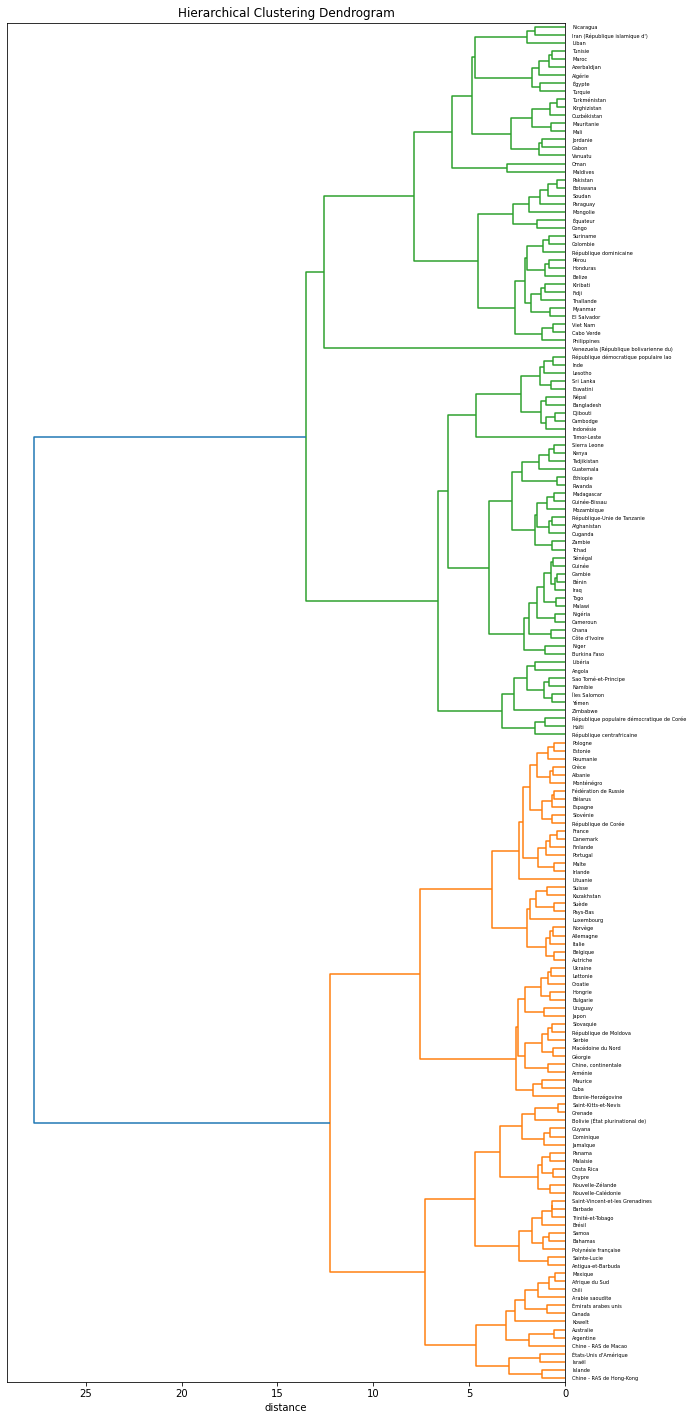

In [20]:
# Affichage du dendrogramme
plot_dendrogram(Z, countries)

In [21]:
# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')
clusters = fcluster(Z, 8, criterion='distance')                

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
countrygroupes = pd.DataFrame({ "cluster": clusters, "title": countries})
countrygroupes

# regroupage (partinionnement, clustering ) des individus fait ! 

,cluster,title
0,3,Afghanistan
1,1,Afrique du Sud
2,2,Albanie
3,4,Algérie
4,2,Allemagne
...,...,...
164,1,Émirats arabes unis
165,4,Équateur
166,1,États-Unis d'Amérique
167,3,Éthiopie


In [22]:
countrygroupes.pivot_table(index="title", columns="cluster", aggfunc=len, fill_value=0)

# tableau de contingence

cluster,1,2,3,4,5
title,,,,,
Afghanistan,0,0,1,0,0
Afrique du Sud,1,0,0,0,0
Albanie,0,1,0,0,0
Algérie,0,0,0,1,0
Allemagne,0,1,0,0,0
...,...,...,...,...,...
Émirats arabes unis,1,0,0,0,0
Équateur,0,0,0,1,0
États-Unis d'Amérique,1,0,0,0,0


In [23]:
G1 = countrygroupes[countrygroupes["cluster"]==1].iloc[ : , 1]
G2 = countrygroupes[countrygroupes["cluster"]==2].iloc[ : , 1]
G3 = countrygroupes[countrygroupes["cluster"]==3].iloc[ : , 1]
G4 = countrygroupes[countrygroupes["cluster"]==4].iloc[ : , 1]
G5 = countrygroupes[countrygroupes["cluster"]==5].iloc[ : , 1]
print("G1:", len(G1),G1)
print("G2:", len(G2), G2)
print("G3", len(G3), G3)
print("G4", len(G4), G4)
print("G5", len(G5), G5)
G1.to_csv("G1.csv")
G2.to_csv("G2.csv")
G3.to_csv("G3.csv")
G4.to_csv("G4.csv")
G5.to_csv("G5.csv")

G1: 35 1                       Afrique du Sud
6                   Antigua-et-Barbuda
7                      Arabie saoudite
8                            Argentine
10                           Australie
13                             Bahamas
15                             Barbade
18     Bolivie (État plurinational de)
21                              Brésil
29                              Canada
30                               Chili
31            Chine - RAS de Hong-Kong
32                Chine - RAS de Macao
34                              Chypre
37                          Costa Rica
43                           Dominique
55                             Grenade
60                              Guyana
70                             Islande
71                              Israël
73                            Jamaïque
80                              Koweït
89                            Malaisie
97                             Mexique
107                 Nouvelle-Calédonie
108               

## Analyse des Composantes Principales
#### quelles variables on doit prendre en compte ? et comment on peut combiner les pour réduire les dimensions 

In [24]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [25]:
# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = datafinal[['Calorie_all/p', 'Protein_all/p', 'Protein_ani/all', 'Calorie_chicken/p', '%PopChange', '%PIBchange']]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) 
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable, mais dans notre cas, il n'y a pas de null à remplir 
data_pca.head()

,Calorie_all/p,Protein_all/p,Protein_ani/all,Calorie_chicken/p,%PopChange,%PIBchange
,,,,,,
Afghanistan,2087.0,58.26,0.209578,5.0,0.151918,1.648846
Afrique du Sud,3020.0,85.33,0.426462,155.0,0.076469,-1.157092
Albanie,3188.0,111.37,0.533447,50.0,-0.007249,2.278743
Algérie,3293.0,91.92,0.271758,24.0,0.107191,-1.130741
Allemagne,3503.0,101.39,0.606470,67.0,0.024023,0.082724


In [26]:
XX = data_pca.values
names = data_pca.index                # ou data.index pour avoir les intitulés   = countries
features = data_pca.columns         # = variables 

print(names)
print(features)

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='', length=169)
Index(['Calorie_all/p', 'Protein_all/p', 'Protein_ani/all',
       'Calorie_chicken/p', '%PopChange', '%PIBchange'],
      dtype='object')


In [27]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(XX)
XX_scaled = std_scale.transform(XX)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(XX_scaled)

PCA(n_components=6)

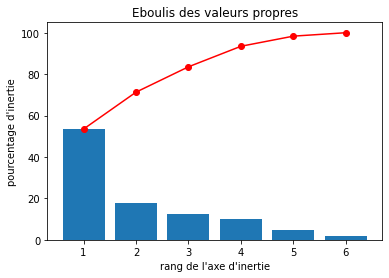

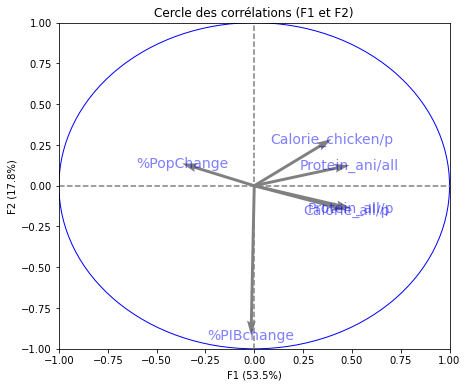

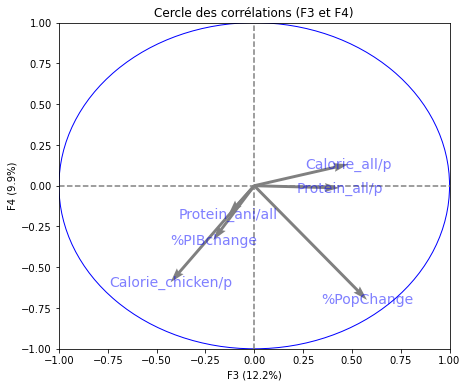

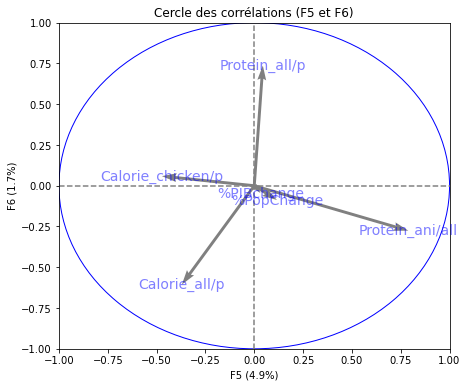

<Figure size 432x288 with 0 Axes>

In [42]:
# Eboulis des valeurs propres / eigen values
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

plt.savefig('cerclecorrelations.png')

### ACP Constatation: 
#### Eboulis de valeurs propres (eigen values)
 - l'ensemble de F1 + F2 représente 71% d'inertie 
 - F1 + F2 + F3 = 80% 
 - F1 + F2 + F3 + F4 = 90% 
 
 #### Corrélation entre les variables 
 - %PIBChange se superpose avec F2 au sens négatif => F2 représente %PIBchange au sens négatif 
 - Calorie_all/p , Protein_all/p, Protein_ani/all sont représentés par F1 positivement; %PopChange a une corrélation négative avec F1
 - Calorie_all/p , Protein_all/p ont corrélation positive avec F1;  De plus, ces 2 se superposent sur F1 et connaissent un angle très petit sur F3 => on peut considérer ces 2 variables comme un ensemble 
 - Protein_ani/all est aussi représenté positivement par F5, contrairement au Calorie_chicken/p qui est représentée négativement par F5



## B. Clustering via méthode K-means
#### Vu que K-means marche très bien en binôme avec ACP dans le cadre de projection des individus (en clusters) sur les plans factoriels, on emploie ici K-means 
#### Selon projet, on doit partitionner l'ensemble des pays en 5 partitions (groupes), cela dit on impute la valeur k=5
 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans      # on a sklearn à dispo 
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 5

# import de l'échantillon
datak = pd.read_csv("datafinal.csv", index_col=0)
datak.index.name =''
datak.dropna(how= "any", inplace=True)

# préparation des données pour le clustering
Xk = datak.values

In [30]:
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(Xk)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [31]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
pca_k = decomposition.PCA(n_components=6).fit(Xk)
Xk_projected = pca_k.transform(Xk)
#print(Xk_projected)

In [32]:
from numpy import asarray
from numpy import savetxt

centroides = km.cluster_centers_       #calculer les centroides des clusters
savetxt("centroides.csv", centroides, delimiter=',' )      #exporter sous forme .CSV

centroides

array([[2.52282051e+03, 6.67415385e+01, 3.40774842e-01, 5.62820513e+01,
        8.84284237e-02, 1.10979974e+00],
       [3.48386667e+03, 1.07705333e+02, 5.34029799e-01, 9.45333333e+01,
        3.40768440e-02, 1.86877153e+00],
       [3.15238235e+03, 9.33288235e+01, 4.97530779e-01, 9.65294118e+01,
        4.78131480e-02, 7.03470324e-01],
       [2.16668000e+03, 5.54284000e+01, 2.57271406e-01, 2.28800000e+01,
        1.19406104e-01, 1.01364760e+00],
       [2.82578049e+03, 8.02251220e+01, 4.60892512e-01, 9.11219512e+01,
        6.35526949e-02, 1.98777512e+00]])

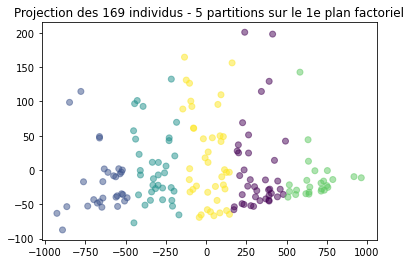

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(Xk_projected[:, 0], Xk_projected[:, 1], c=clusters.astype(float), cmap = 'viridis', alpha=.5)
plt.title("Projection des {} individus - 5 partitions sur le 1e plan factoriel".format(Xk_projected.shape[0]))
plt.show(block=False)

plt.savefig('5clusters_partitions_1plan.png')

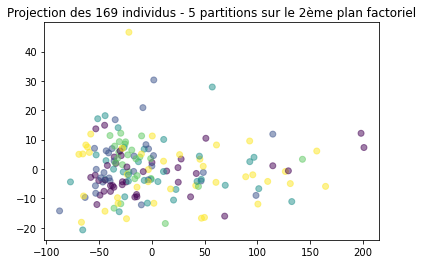

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(Xk_projected[:, 1], Xk_projected[:, 2], c=clusters.astype(float), cmap = 'viridis', alpha=.5)
plt.title("Projection des {} individus - 5 partitions sur le 2ème plan factoriel".format(Xk_projected.shape[0]))
plt.show(block=False)

plt.savefig('5clusters_partitions_2plan.png')

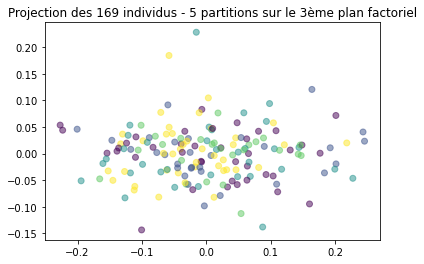

<Figure size 432x288 with 0 Axes>

In [41]:
plt.scatter(Xk_projected[:, 4], Xk_projected[:, 5], c=clusters.astype(float), cmap = 'viridis', alpha=.5)
plt.title("Projection des {} individus - 5 partitions sur le 3ème plan factoriel".format(Xk_projected.shape[0]))
plt.show(block=False)

plt.savefig('5clusters_partitions_3plan.png')

### Constatation: 
- les 5 groupes se distinguent clairement en fonction de F1 (abscisse), dont G green se concentre le plus en terme de F1,  suivi par brown purple et blue 
- sur le 2ème et 3ème plans factoriels, on voit pas des clusters évidents => les individus ne sont pas bien représentés par ces 2 plans , ctd à ignorer 


In [43]:
# ajouter une colonne 'cluster' au dataframe principale

data2=pd.read_csv('datafinal_merge.csv', index_col=0)
datagroupes= pd.merge(data2, countrygroupes,left_on= "Zone", right_on="title")
print(datagroupes.info())
datagroupes.to_csv("datagroupes.csv")

datagroupes=datagroupes.drop('title', axis=1)
datagroupes.sort_values(by="cluster", ascending = True)

G1data= datagroupes[datagroupes["cluster"] == 1]
G2data= datagroupes[datagroupes["cluster"] == 2]
G3data= datagroupes[datagroupes["cluster"] == 3]
G4data= datagroupes[datagroupes["cluster"] == 4]
G5data= datagroupes[datagroupes["cluster"] == 5]

datagroupes.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zone               169 non-null    object 
 1   Calorie_all/p      169 non-null    float64
 2   Protein_all/p      169 non-null    float64
 3   Protein_ani/all    169 non-null    float64
 4   Calorie_chicken/p  169 non-null    float64
 5   %PopChange         169 non-null    float64
 6   %PIBchange         169 non-null    float64
 7   cluster            169 non-null    int32  
 8   title              169 non-null    object 
dtypes: float64(6), int32(1), object(2)
memory usage: 12.5+ KB
None


,Zone,Calorie_all/p,Protein_all/p,Protein_ani/all,Calorie_chicken/p,%PopChange,%PIBchange,cluster
0,Afghanistan,2087.0,58.26,0.209578,5.0,0.151918,1.648846,3
1,Afrique du Sud,3020.0,85.33,0.426462,155.0,0.076469,-1.157092,1
2,Albanie,3188.0,111.37,0.533447,50.0,-0.007249,2.278743,2
3,Algérie,3293.0,91.92,0.271758,24.0,0.107191,-1.130741,4
4,Allemagne,3503.0,101.39,0.606470,67.0,0.024023,0.082724,2


## Analyse des variables cluster par cluster
#### Boxplots des variables de tous les clusters (partitions), pour sortir le,s cluster,s qu'on a intérêt d'attaquer 

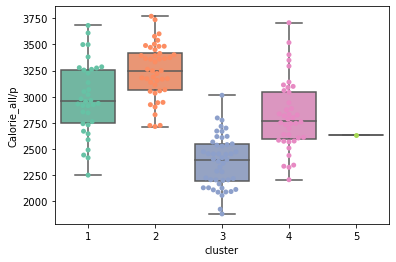

In [44]:
import seaborn as sns

ax = sns.boxplot(y="Calorie_all/p", x="cluster",
                 data=datagroupes, palette="Set2")
ax = sns.swarmplot(y="Calorie_all/p", x="cluster",
                 data=datagroupes, palette="Set2")

plt.savefig("Calorie_all.png")

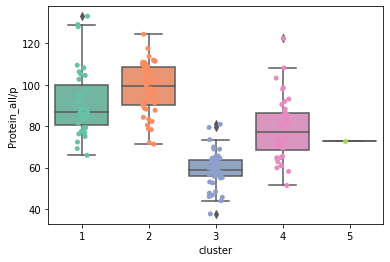

In [45]:
ax2 = sns.boxplot(y="Protein_all/p", x="cluster",
                 data=datagroupes, palette="Set2")
ax2 = sns.stripplot(y="Protein_all/p", x="cluster", 
                 data=datagroupes, palette="Set2")
plt.savefig("Protein_all.png")

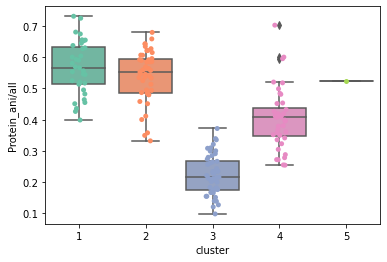

In [46]:
ax3 = sns.boxplot(y="Protein_ani/all", x="cluster",
                 data=datagroupes, palette="Set2")
ax3 = sns.stripplot(y="Protein_ani/all", x="cluster", 
                 data=datagroupes, palette="Set2")
plt.savefig("Protein_aniofall.png")

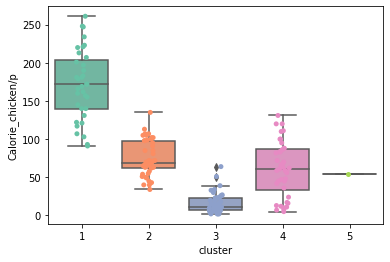

In [47]:
ax4 = sns.boxplot(y="Calorie_chicken/p", x="cluster",
                 data=datagroupes, palette="Set2")
ax4 = sns.stripplot(y="Calorie_chicken/p", x="cluster", 
                 data=datagroupes, palette="Set2")
plt.savefig("calorie_chicken.png")

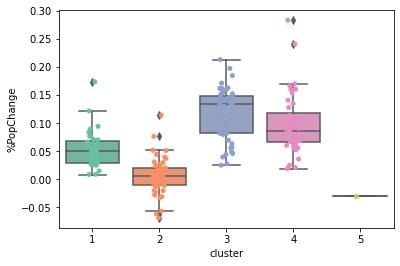

In [48]:
ax5 = sns.boxplot(y="%PopChange", x="cluster",
                 data=datagroupes, palette="Set2")
ax5 = sns.stripplot(y="%PopChange", x="cluster", 
                data=datagroupes, palette="Set2")
plt.savefig("PopChange13_18.png")

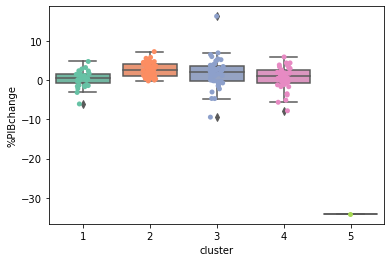

In [49]:
ax = sns.boxplot(y="%PIBchange", x="cluster",
                 data=datagroupes, palette="Set2")
ax6 = sns.stripplot(y="%PIBchange", x="cluster", 
              data=datagroupes, palette="Set2")
plt.savefig("PIBchange.png")

### Constatation: 
- Calorie_all/p et Protein_all/p ont variabilités similaires pour les 5 clusters. ça résonne avec leur projection sur les cercles de corrélations

- Cluster 1 a une disponibilité élevée (2ème, précédé par Cluster2) en proteine et calorie par habitant; d'ailleurs, une  proportion de protéine animale en 1er et ratio super élevé (1er) en terme de Calorie provenant de volailles. Donc on peut surnommer ce groupe de pays "grands consommateurs de volaille". A part de ça, C1 population a augmenté d'environ 5% durant 2013-2018

- Contrairement au Cluster1, Cluster2 connait ratios plus haut en calorie et protéine par habitant (en 1er) , mais au niveau de Calorie_chicken quasi-moitié par rapport à Cluster1. Et protein_ani/all similaire à Cluster1, donc on peut en conclure que Cluster2 consomme proportionnellement plus d'autres animaux que volailles. Par contre on pourrait prévenir une possibilité de croissance en volaille dans leur structure de noutrition vu que C2 maintien une croissance PIB/habitant le plus élevée 2015-2019.

- Cluster 3 ont des ratios les plus bas parmi les 5 clusters sur le plan Calorie_all/p,	Protein_all/p, Protein_ani/all, Calorie_chicken/p, ce qui sous-entend que C3 est dans état de sous-noutrition. Mais paradoxalement C3 connait une forte croissance en population depuis 5 ans et l'évolution PIB/habitant succède C2 et se classe en 2ème. D'où on voit un potentiel de croissance en consommation volailles. 

- Cluster 4 se classe en 3ème sur le plan Calorie_all/p, Protein_all/p, Protein_ani/all, Calorie_chicken/p. %PopChange en 2ème et %PIBchange en 3ème. => pas de particularité à remarquer.

- Cluster 5 connaît leur %PIBchange et %PopChange en forte baisse. => à éviter 



#### En analysant les listes de clusters, on constate que : 
- cluster1 regroupe les pays d'émergence du monde entier
- cluster2 regroupe dans sa majorité les pays de l'Europe-Est qui ont habitude de manger porc etc. 
- cluster3 représente des pays sous-développés, surtout une très faible stabilité politique et économique (corruption, douanière) 
- cluster4 englobe pour sa majorité les pays de Moyen-Orient, qui ont de strictes disciplines au niveau de régime alimentaire (halal), mais quand même une potentialité d'exporter vers ces pays au conditions qu'on pourrait combler les disciplines ou/et on pourrait exporter les poulets en vivant. 
- cluster5 est seulement un pays: Venezuela

=> Pour ne pas risquer beaucoup, vaut mieux qu'on cible cluster1. 

In [50]:
# ici on prend la variable "%PIBchange" (évolution de PIB par habitant durant 5 ans) pour référence, vu que PIB par habitant sous-entend le pouvoir d'achat

listG1= G1data.sort_values("%PIBchange", ascending= False).head(10)[['Zone', '%PIBchange']]

listG1.to_csv('liste_G1_export.csv')
listG1

,Zone,%PIBchange
60,Guyana,4.846810
43,Dominique,3.292833
89,Malaisie,2.925966
6,Antigua-et-Barbuda,2.465762
34,Chypre,2.428199
71,Israël,1.828296
119,Polynésie française,1.811148
131,Saint-Kitts-et-Nevis,1.764397
134,Samoa,1.749600
166,États-Unis d'Amérique,1.549990


/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seabor

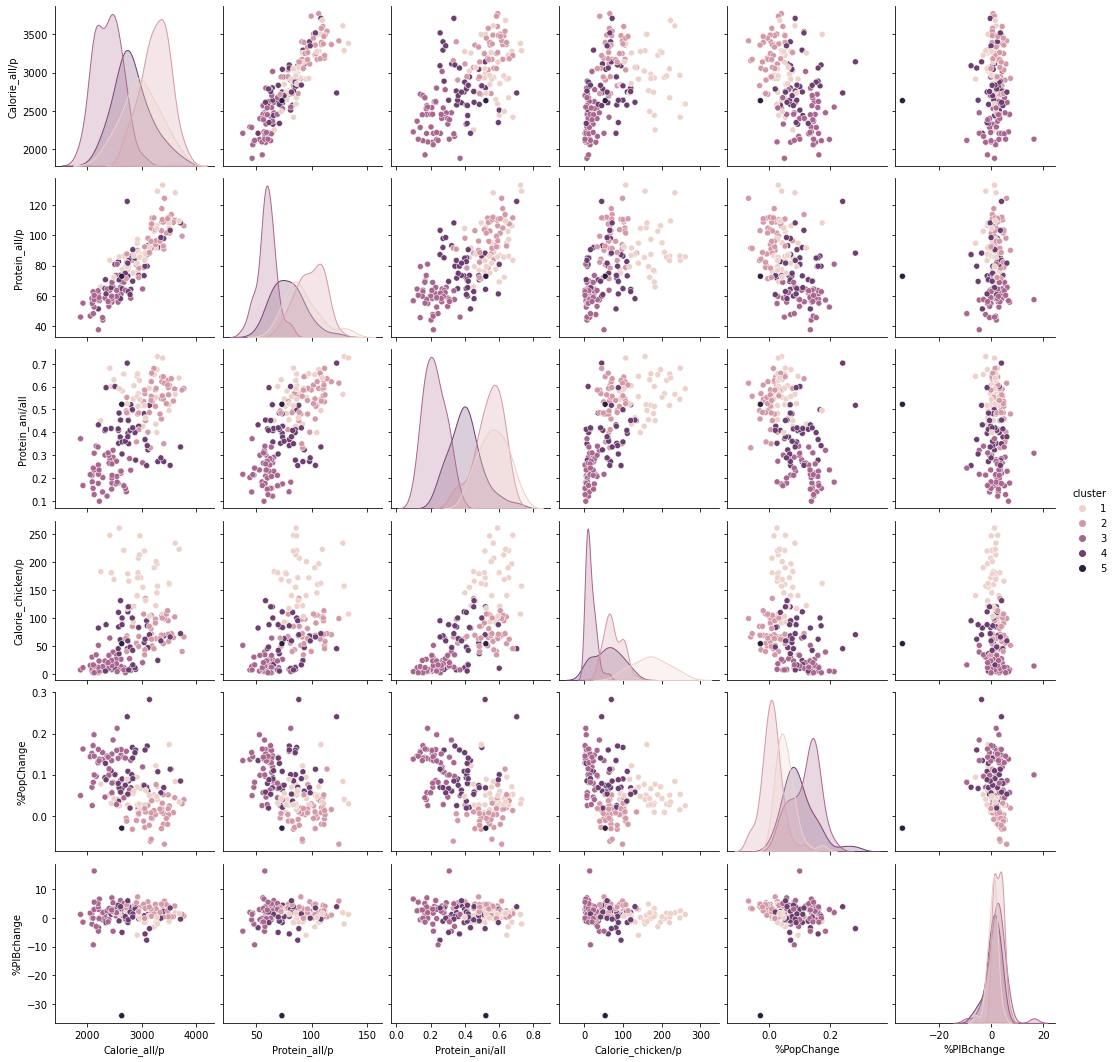

In [51]:
sns_plot = sns.pairplot(datagroupes, hue='cluster', height=2.5)
plt.savefig('datagroupes_pairplot.png')

# Analyse d'inférence statistique: test d'hypothèse
## Test d'adéquation - méthode KS 
### si les variables conforme à la loi normale

#### dans notre cas, hypothèse nulle (H0) est distribution non-gaussienne, autrement dit distribution qui ne conforme pas à la loi normale

In [73]:
from scipy.stats import ks_2samp


In [75]:
ks_2samp(datagroupes["Calorie_all/p"],list(np.random.normal(np.mean(datagroupes["Calorie_all/p"]), np.std(datagroupes["Calorie_all/p"]), 1000)))

KstestResult(statistic=0.05702958579881657, pvalue=0.7099314883036487)

#### P-value= 70% > 5% (H0) => non-rejet de l’hypothèse nulle au niveau de test 5% => distribution non-gaussienne ( distribution ne conforme pas à la loi normale ) 


In [83]:
ks_2samp(datagroupes["Protein_all/p"],list(np.random.normal(np.mean(datagroupes["Protein_all/p"]), np.std(datagroupes["Protein_all/p"]), 1000)))

KstestResult(statistic=0.0586094674556213, pvalue=0.678082459257167)

#### P-value = 67% > 5% , On ne peut pas rejetter l’hypothèse nulle au niveau de test 5%. => distribution non-gaussienne

In [84]:
ks_2samp(datagroupes["Protein_ani/all"],list(np.random.normal(np.mean(datagroupes["Protein_ani/all"]), np.std(datagroupes["Protein_ani/all"]), 1000)))

KstestResult(statistic=0.09870414201183432, pvalue=0.11091336929726703)

#### P-value = 11% > 5% , On ne peut pas rejetter l’hypothèse nulle au niveau de test 5%. => distribution non-gaussienne

In [86]:
ks_2samp(datagroupes["Calorie_chicken/p"],list(np.random.normal(np.mean(datagroupes["Calorie_chicken/p"]), np.std(datagroupes["Calorie_chicken/p"]), 1000)))


KstestResult(statistic=0.13146745562130177, pvalue=0.012121595218308245)

#### P-value = 1%< 1.2% < 5% , rejet de l’hypothèse nulle au niveau de test 5% => distribution gaussienne ( distribution à la loi normale )

In [87]:
ks_2samp(datagroupes["%PopChange"],list(np.random.normal(np.mean(datagroupes["%PopChange"]), np.std(datagroupes["%PopChange"]), 1000)))


KstestResult(statistic=0.06901775147928994, pvalue=0.4728866039431985)

#### P-value = 47% >  5% , On ne peut pas rejetter l’hypothèse nulle au niveau de test 5%. => distribution non-gaussienne

In [88]:
ks_2samp(datagroupes["%PIBchange"],list(np.random.normal(np.mean(datagroupes["%PIBchange"]), np.std(datagroupes["%PIBchange"]), 1000)))

KstestResult(statistic=0.1306508875739645, pvalue=0.01288811583428584)

#### P-value = 1% < 1.2% < 5% , On peut rejetter l’hypothèse nulle au niveau de test 5%. => distribution gaussienne, à la loi normale

#End